#conda install -c conda-forge yfinance
#conda install -c conda-forge appdirs
#or  pip install yfinance pandas numpy matplotlib


#Author: Datawaves  

#**Stock Market Index Analysis: Nifty 50 vs Dow Jones**  

#This program retrieves and analyzes historical stock market data for the Nifty 50 and Dow Jones indices.  

#Features:  
#- Fetches 5 years of historical data from Yahoo Finance.  
#- Plots closing prices of both indices.  
#- Applies Z-score normalization for comparative analysis.  
#- Computes daily returns and visualizes buy/sell signals using Z-score deviations.  

#**Keywords:** Stock Market Analysis, Nifty 50, Dow Jones, Historical Data, Z-Score, Trading Signals, Financial Data Visualization  


In [1]:
import yfinance as yf
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)       # Adjust width to prevent wrapping

# Define symbols and period
symbols = {'Nifty 50': '^NSEI', 'Dow Jones': '^DJI'}
period_years = 5
start_date = pd.Timestamp.today() - pd.DateOffset(years=period_years)
end_date = pd.Timestamp.today()

# Fetch historical data
data = {name: yf.download(symbol, start=start_date, end=end_date, progress=False) for name, symbol in symbols.items()}

# Print the first few rows of each dataset
for name, df in data.items():
    print(f"{name} data sample:")
    print(df.head())
    print("\n" + "="*50 + "\n")


YF.download() has changed argument auto_adjust default to True
Nifty 50 data sample:
Price             Close         High          Low         Open  Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI   ^NSEI
Date                                                                  
2020-04-07  8792.200195  8819.400391  8360.950195  8446.299805  814200
2020-04-08  8748.750000  9131.700195  8653.900391  8688.900391  896500
2020-04-09  9111.900391  9128.349609  8904.549805  8973.049805  742100
2020-04-13  8993.849609  9112.049805  8912.400391  9103.950195  644000
2020-04-15  8925.299805  9261.200195  8874.099609  9196.400391  879100


Dow Jones data sample:
Price              Close          High           Low          Open     Volume
Ticker              ^DJI          ^DJI          ^DJI          ^DJI       ^DJI
Date                                                                         
2020-04-08  23433.570312  23513.400391  22682.990234  22893.470703  472740000
2020-04-09

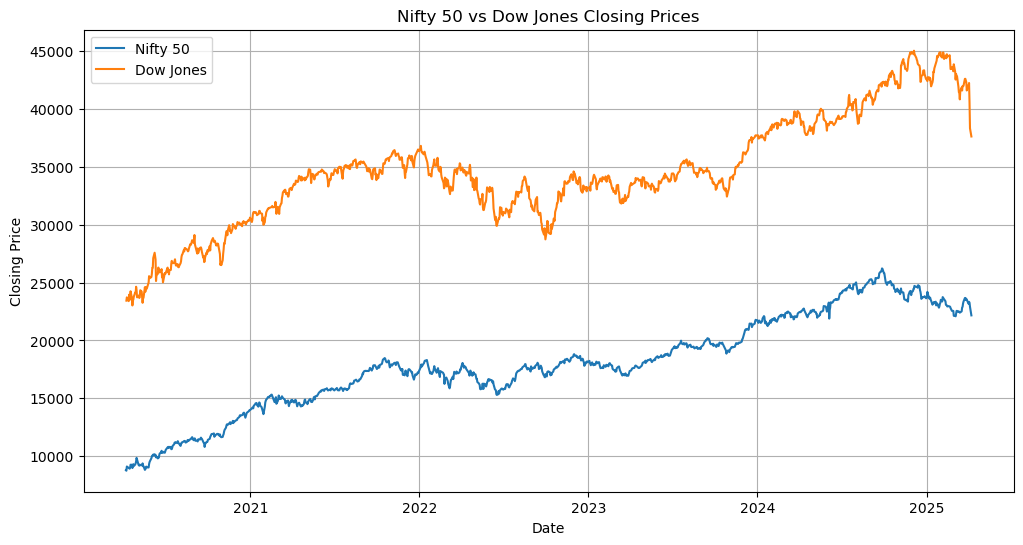

In [2]:
import matplotlib.pyplot as plt

# Plot the closing prices
plt.figure(figsize=(12, 6))

for name, df in data.items():
    if df.empty:
        print(f"Skipping {name}, no data available.")
        continue
    plt.plot(df.index, df['Close'], label=name)

# Formatting the chart
plt.title("Nifty 50 vs Dow Jones Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid()

# Show the plot
plt.show()


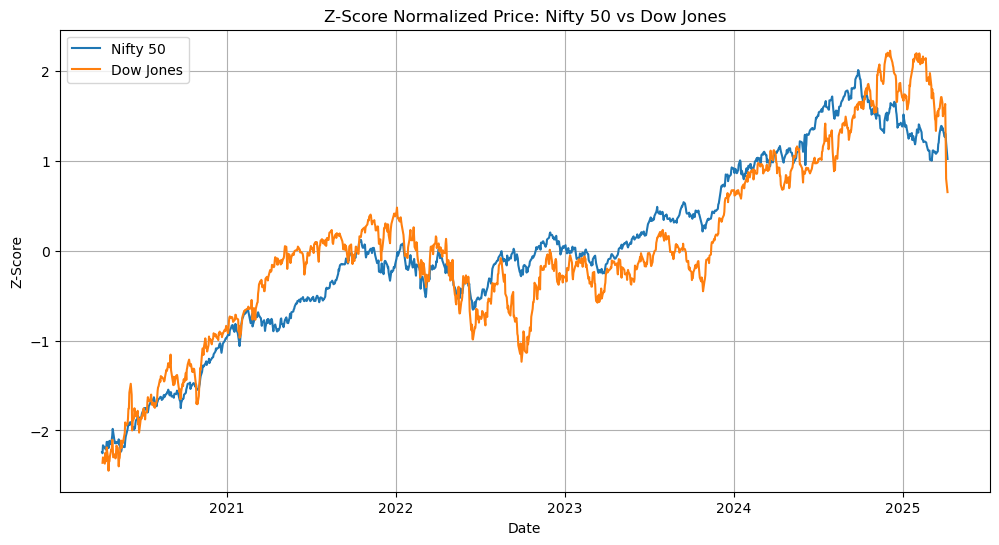

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure both datasets are available
if not data['Dow Jones'].empty and not data['Nifty 50'].empty:
    # Compute Z-score normalization
    def z_score(series):
        return (series - series.mean()) / series.std()

    # Apply Z-score normalization
    zscore_data = {name: z_score(df['Close']) for name, df in data.items()}

    # Plot the Z-score normalized data
    plt.figure(figsize=(12, 6))
    for name, series in zscore_data.items():
        plt.plot(data[name].index, series, label=name)

    # Formatting the chart
    plt.title("Z-Score Normalized Price: Nifty 50 vs Dow Jones")
    plt.xlabel("Date")
    plt.ylabel("Z-Score")
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()
else:
    print("Error: Missing data for one or both indices.")


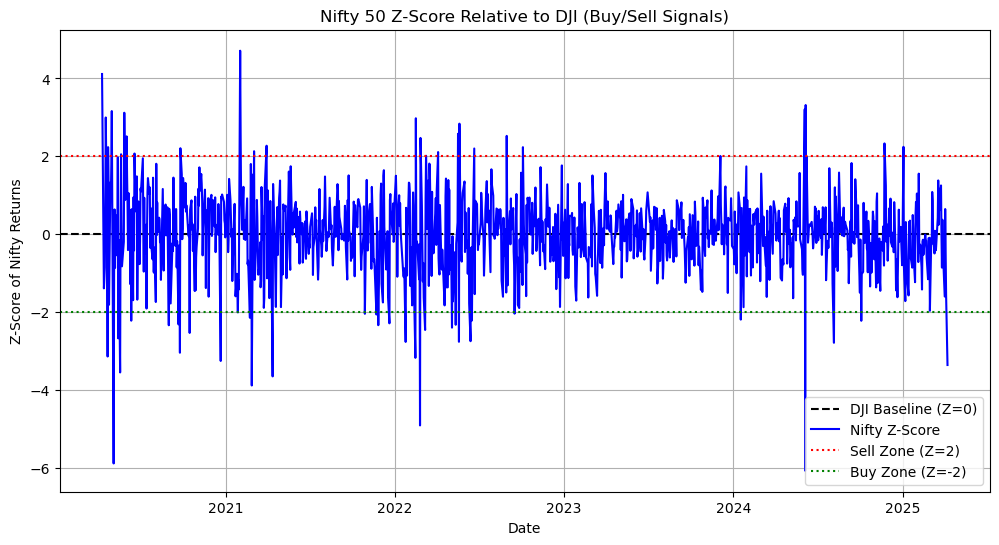

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract only 'Close' prices
dji_df = data['Dow Jones'][['Close']].copy().rename(columns={'Close': 'DJI'})
nifty_df = data['Nifty 50'][['Close']].copy().rename(columns={'Close': 'Nifty'})

# Ensure indices are datetime type
dji_df.index = pd.to_datetime(dji_df.index)
nifty_df.index = pd.to_datetime(nifty_df.index)

# Merge both datasets on date
df_combined = dji_df.join(nifty_df, how='inner').dropna()

# Compute daily returns
df_combined['DJI Returns'] = df_combined['DJI'].pct_change()
df_combined['Nifty Returns'] = df_combined['Nifty'].pct_change()

# Calculate Z-score for Nifty relative to its own mean/std
nifty_mean = df_combined['Nifty Returns'].mean()
nifty_std = df_combined['Nifty Returns'].std()
df_combined['Nifty Z-Score'] = (df_combined['Nifty Returns'] - nifty_mean) / nifty_std

# Plot Z-Score comparison
plt.figure(figsize=(12, 6))

plt.axhline(0, color='black', linestyle='--', label="DJI Baseline (Z=0)")  # DJI as a straight reference line
plt.plot(df_combined.index, df_combined['Nifty Z-Score'], label="Nifty Z-Score", color='blue')

# Mark Buy/Sell zones
plt.axhline(2, color='red', linestyle='dotted', label="Sell Zone (Z=2)")
plt.axhline(-2, color='green', linestyle='dotted', label="Buy Zone (Z=-2)")

# Formatting the chart
plt.title("Nifty 50 Z-Score Relative to DJI (Buy/Sell Signals)")
plt.xlabel("Date")
plt.ylabel("Z-Score of Nifty Returns")
plt.legend()
plt.grid()

# Show the plot
plt.show()
